Name: Brendan Kearney

Email: bkearne5@uncc.edu

### Charting COVID-19 trends


Datasets retrieved from:

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

path = '/Users/bkearney/Bioinf_2'

# Old data, goes up to 9 March 2020
confirmed = pd.read_csv("time_series_19-covid-Confirmed.csv")
deaths = pd.read_csv("time_series_19-covid-Deaths.csv")
recovered = pd.read_csv("time_series_19-covid-Recovered.csv")

# Updated world data, should be usable for most recent post
confirmed2 = pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths2 = pd.read_csv("time_series_covid19_deaths_global.csv")
recovered2 = pd.read_csv("time_series_covid19_recovered_global.csv")
last_day = list(confirmed2.columns)[-1]

# Updated US
confirmed_usa = pd.read_csv("time_series_covid19_confirmed_US.csv")
deaths_usa = pd.read_csv("time_series_covid19_deaths_US.csv")
last_dayUS = list(confirmed_usa.columns)[-1]

###   a. area map of deaths by country within last 8 days

Text(0, 0.5, 'Proportion')

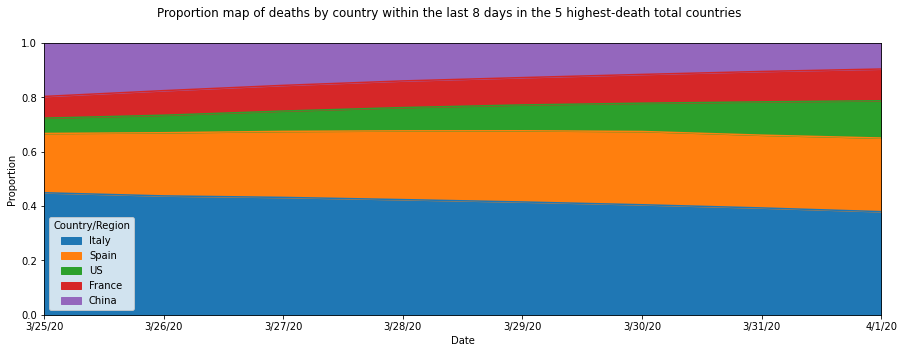

In [2]:
# Sum all deaths per day by country
deaths_byCountry = deaths2.groupby("Country/Region").sum()

# Remove latitude and longitude columns
deaths_byCountry = deaths_byCountry.drop(["Lat","Long"], axis=1)

# Sort countries by highest to lowest death counts on the most recent day
deaths_byCountry.sort_values(by=last_day,ascending=False,inplace=True)

# Group top 5 highest deaths
top_DbC = deaths_byCountry.head().T

# Find total number of days
days = len(top_DbC.index)

# Save only the last 8 days and set index as the date
recent_DbC = top_DbC.reset_index().loc[days-8:days-1]
recent_DbC = recent_DbC.set_index('index')

# assign proportions to each country based on sum of deaths
row_total_DbC = recent_DbC.sum(axis='columns')
DbC_proportions = recent_DbC.div(row_total_DbC, axis='index')
DbC_proportions

# Graph and label
p3 = DbC_proportions.plot(kind='area', figsize=(15,5), ylim=(0,1))
p3.figure.suptitle("Proportion map of deaths by country within the last 8 days in the 5 highest-death total countries")
p3.set_xlabel("Date")
p3.set_ylabel("Proportion")

###   b. line graph of deaths by US state

Text(0, 0.5, '# of deaths')

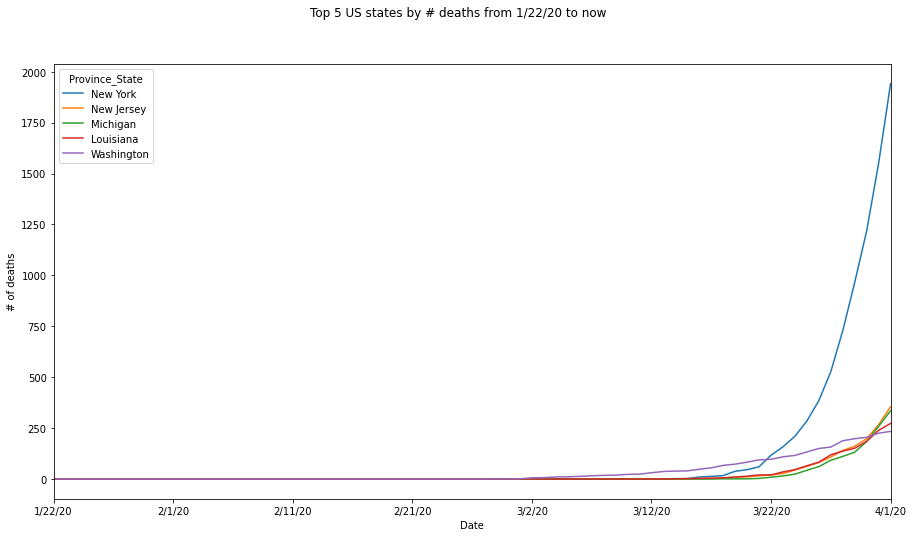

In [3]:
# Use deaths_usa (no need to filter because csv only contains usa data)

# Find totals for each state, sort by descending
deaths_byState = deaths_usa.groupby("Province_State").sum()

deaths_byState.sort_values(by=last_dayUS,ascending=False,inplace=True)

# Remove unnecessary columns
deaths_filt = deaths_byState.drop(["UID","code3","FIPS","Lat","Long_","Population"], axis=1)

# # Create line plot of top 5 highest-death states
p1 = deaths_filt.head().T.plot(figsize=(15,8))
p1.figure.suptitle('Top 5 US states by # deaths from 1/22/20 to now')
p1.set_xlabel('Date')
p1.set_ylabel('# of deaths')

###   c. line graph of (confirmed cases - recovered) by US State

## Have to use old data (through 3/9/20) as the source doesn't have updated "recovered" US-specific data.

/Users/bkearney/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/bkearney/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, '# of unrecovered (confirmed-recovered)')

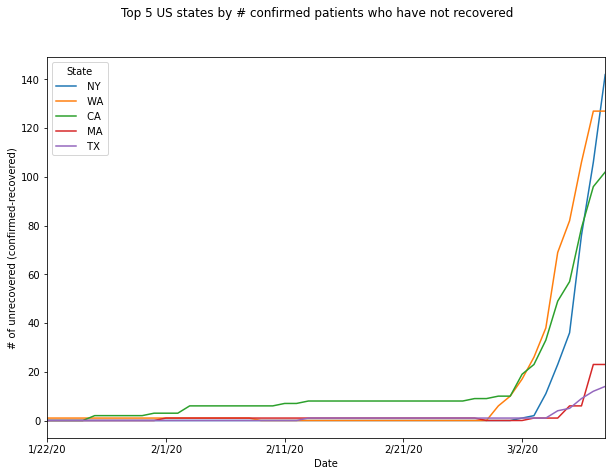

In [4]:
# 

# Filter for US cases then combine by state
confirmed_US = confirmed[confirmed["Country/Region"] == "US"]
confirmed_US["State"] = confirmed_US["Province/State"].str.split(",",n=2,expand=True)[1]
confirmed_byState = confirmed_US.iloc[:,4:53].groupby("State").sum()

# Same as confirmed
recovered_US = recovered[recovered["Country/Region"] == "US"]
recovered_US["State"] = recovered_US["Province/State"].str.split(",",n=2,expand=True)[1]
recovered_byState = recovered_US.iloc[:,4:53].groupby("State").sum()

# Find # of confirmed cases who have no recovered by state
unrecovered_byState = confirmed_byState - recovered_byState

# Check that both confirmed and recovered have the same order of states
# l1 = list(confirmed_byState.index)
# l2 = list(recovered_byState.index)
# print(l1 == l2, ". Dataframes have the same indeces")

# Sort by most recent (at the time)
unrecovered_byState.sort_values(by="3/9/20",ascending=False,inplace=True)

# Plot and label
p2 = unrecovered_byState.head().T.plot(figsize=(10,7))
p2.figure.suptitle('Top 5 US states by # confirmed patients who have not recovered')
p2.set_xlabel('Date')
p2.set_ylabel('# of unrecovered (confirmed-recovered)')

###    a. What the highest single day increase in confirmed cases by Country

Largest increase: 26365.0 on day: 3/31/20 by country: US


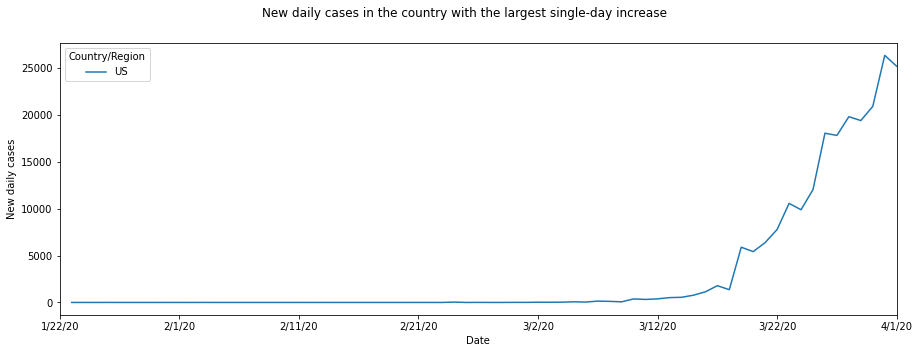

In [5]:
# Drop unnecessary columns
confirmed_noLat = confirmed2.drop(["Lat","Long"], axis=1)

# Group cases by country
confirmed_byCountry = confirmed_noLat.groupby("Country/Region").sum()

# Find the deltas from one column to the next (increase per day) and store that in a new df
diff_country = confirmed_byCountry.diff(axis=1)

# Find single largest jump for country by day
max_day = diff_country.max()

# Find highest of these maxes (one point)
single_max = max(max_day[1:])

# Find day associated with that point (single_max)
single_maxDay = max_day[max_day == single_max].index[0]
single_maxDay

# Find country associated with point
max_country = diff_country[diff_country[single_maxDay]==diff_country[single_maxDay].max()]
max_countryName = max_country.index.values[0]

# Plot line graph of that country's daily increases over time
p4 = max_country.T.plot(figsize = (15,5))
p4.figure.suptitle('New daily cases in the country with the largest single-day increase')
p4.set_xlabel("Date")
p4.set_ylabel("New daily cases")
print('Largest increase:',single_max,'on day:',single_maxDay,'by country:', max_countryName)

Text(0, 0.5, 'Total (cumulative) cases')

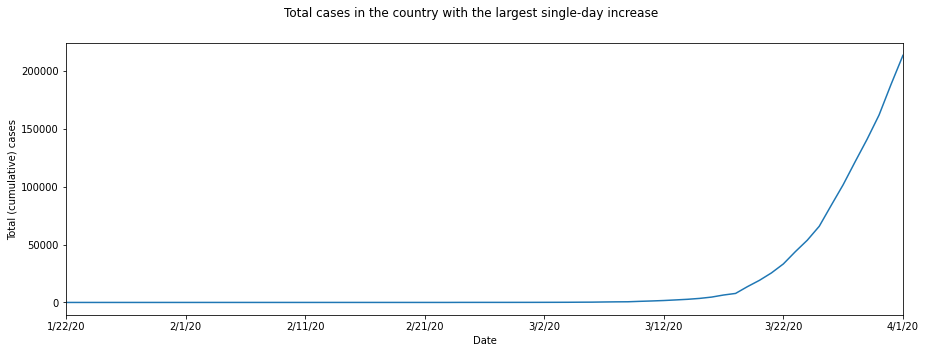

In [6]:
# Plot the total # of confirmed cases over time in the same country

total_cases = confirmed_byCountry.loc[max_countryName]
p4a = total_cases.T.plot(figsize = (15,5))
p4a.figure.suptitle('Total cases in the country with the largest single-day increase')
p4a.set_xlabel("Date")
p4a.set_ylabel("Total (cumulative) cases")

###    b. The highest single day increase in confirmed cases by US State

Largest increase: 9170.0 on day: 3/31/20 by state: New York


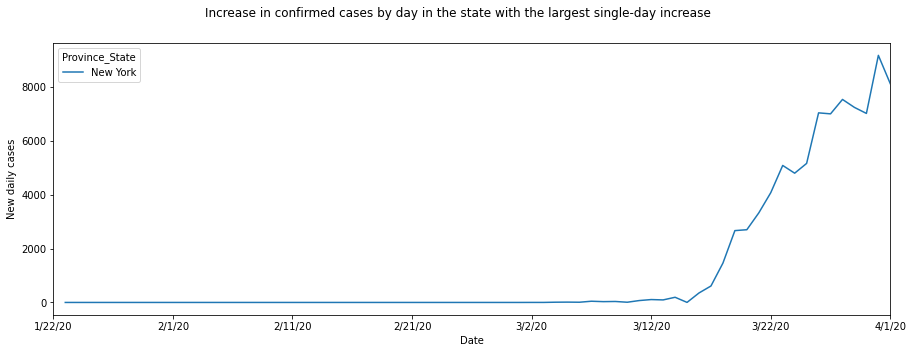

In [7]:
# Remove columns and sum by state
column_drop = ['UID','iso2','iso3','code3','FIPS','Admin2','Country_Region','Lat','Long_','Combined_Key']
confirmed_byStateUpdated = confirmed_usa.drop(column_drop, axis=1)
confirmed_byStateUpdated = confirmed_byStateUpdated.groupby("Province_State").sum()

# Same as method for countries

diff_state = confirmed_byStateUpdated.diff(axis=1)
max_dayState = diff_state.max()
single_maxState = max(max_dayState[1:])
single_maxStateDay = max_dayState[max_dayState == single_maxState].index[0]
max_state = diff_state[diff_state[single_maxStateDay]==diff_state[single_maxStateDay].max()]
max_stateName = max_state.index.values[0]

p5 = max_state.T.plot(figsize = (15,5))
p5.figure.suptitle('Increase in confirmed cases by day in the state with the largest single-day increase')
p5.set_xlabel("Date")
p5.set_ylabel("New daily cases")
print('Largest increase:',single_maxState,'on day:',single_maxStateDay,'by state:', max_stateName)

Text(0, 0.5, 'Total (cumulative) cases')

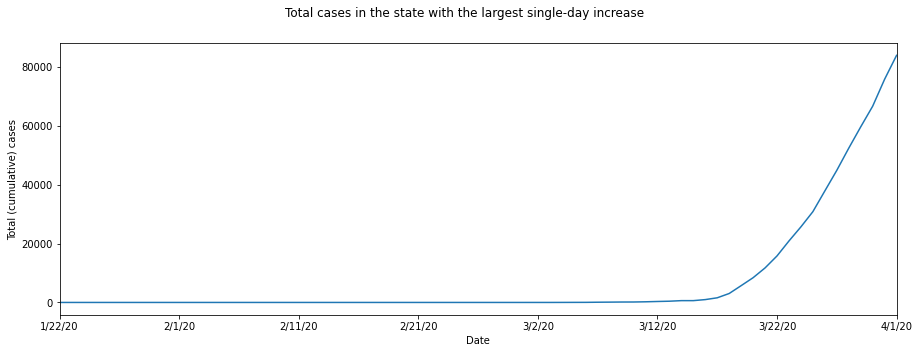

In [8]:
total_cases = confirmed_byStateUpdated.loc[max_stateName]
p5a = total_cases.T.plot(figsize = (15,5))
p5a.figure.suptitle('Total cases in the state with the largest single-day increase')
p5a.set_xlabel("Date")
p5a.set_ylabel("Total (cumulative) cases")


## Top 10 deaths to confirmed ratios, which countries have the best and worst survival rates?

Countries with zero deaths despite having confirmed cases:  ['Djibouti', 'Saint Vincent and the Grenadines', 'Saint Lucia', 'Saint Kitts and Nevis', 'Rwanda', 'Libya', 'Dominica', 'Papua New Guinea', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Georgia', 'Grenada', 'Nepal', 'Guinea', 'Guinea-Bissau', 'Latvia', 'Laos', 'Kyrgyzstan', 'Kuwait', 'Zambia', 'Liechtenstein', 'Congo (Brazzaville)', 'Madagascar', 'Malta', 'Mongolia', 'Mozambique', 'Holy See', 'Haiti', 'Namibia', 'Maldives', 'Chad', 'Liberia', 'Central African Republic', 'Antigua and Barbuda', 'Bhutan', 'Sierra Leone', 'Vietnam', 'Burundi', 'Suriname', 'Seychelles', 'Somalia', 'Benin', 'Belize', 'Barbados', 'Timor-Leste', 'Uganda', 'Cambodia']


Text(0, 0.5, 'Death rate')

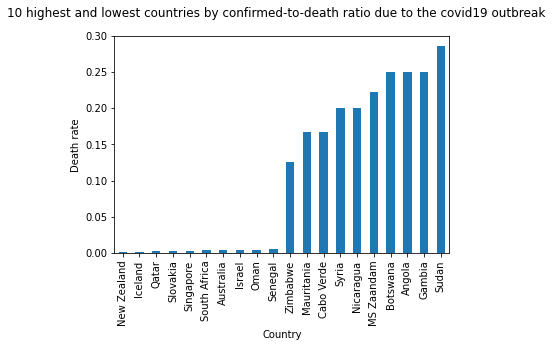

In [9]:
# Unsort data frame (used in part 1a)
deaths_byCountry = deaths2.groupby("Country/Region").sum()

# Create series of confirmed and deaths by country only on most recent day
recent_confirmed = confirmed_byCountry[last_day]
recent_deaths = deaths_byCountry[last_day]

recent_confirmed.sort_values()
recent_deaths.sort_values()


# Find ratio of deaths to total cases for that day, sort numerically, and remove 0 cases
ratio = recent_deaths/recent_confirmed
ratio = ratio.sort_values()

# Find and print countries that have confirmed cases, but no deaths
no_deaths = ratio[ratio.values == 0]
no_deathsList = no_deaths.index.tolist()
no_deathsNumCases = recent_confirmed.filter(items=no_deathsList).sort_values(ascending=False)
print("Countries with zero deaths despite having confirmed cases: ",no_deathsList)

# Remove 0 death rate countries from df and find the top 10 best and worst survival rates
# (for countries that actually have >0 deaths)
ratio = ratio[ratio.values != 0]
lowest = ratio.head(10)
highest = ratio.tail(10)
all_20 = pd.concat([lowest,highest])

# Create bar chart with highest and lowest countries combined
p6 = all_20.plot.bar()
p6.figure.suptitle("10 highest and lowest countries by confirmed-to-death ratio due to the covid19 outbreak")
p6.set_xlabel("Country")
p6.set_ylabel("Death rate")
